In [56]:
# Task 1
import numpy as np

def svd_realization(matrix_A):
    at_a = np.dot(matrix_A.T, matrix_A)
    a_at = np.dot(matrix_A, matrix_A.T)
    
    eigen_values_v, eigen_vectors_v = np.linalg.eigh(at_a)
    eigen_values_u, eigen_vectors_u = np.linalg.eigh(a_at)
    
    sorted_ind_v = np.argsort(eigen_values_v)[::-1]
    sorted_ind_u = np.argsort(eigen_values_u)[::-1]
    
    eigen_values_v = eigen_values_v[sorted_ind_v]
    eigen_vectors_v = eigen_vectors_v[:, sorted_ind_v]
    V = eigen_vectors_v
    
    eigen_values_u = eigen_values_u[sorted_ind_u]
    eigen_vectors_u = eigen_vectors_u[:, sorted_ind_u]
    U = eigen_vectors_u

    sigma_values = np.sqrt(eigen_values_v)
    E = np.zeros_like(matrix_A, dtype=float)
    np.fill_diagonal(E, sigma_values)
    
    for i in range(min(matrix_A.shape)):
        U[:,i] = np.dot(np.dot(matrix_A,V[:,i]),(1/E[i,i]))
    
    return U, E, V.T

matrix_A = np.array([[1, 2], [3, 4], [5, 6]])
U, E, V_T = svd_realization(matrix_A)

print(f"Matrix A:\n{matrix_A}\nMatrix U:\n{U}\nMatrix E:\n{E}\nMatrix V^T:\n{V_T}\n")

checked_A = np.dot(np.dot(U, E), V_T)
print(f"Checked matrix A:\n{checked_A}\n")

[-0.2298477  -0.52474482 -0.81964194]
Matrix A:
[[1 2]
 [3 4]
 [5 6]]
Matrix U:
[[ 0.2298477   0.88346102  0.40824829]
 [ 0.52474482  0.24078249 -0.81649658]
 [ 0.81964194 -0.40189603  0.40824829]]
Matrix E:
[[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
Matrix V^T:
[[ 0.61962948  0.78489445]
 [-0.78489445  0.61962948]]

Checked matrix A:
[[1. 2.]
 [3. 4.]
 [5. 6.]]



In [3]:
# Task 2
import pandas as pd

file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)

ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [59]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k=3)

(501, 3)
(3, 860)


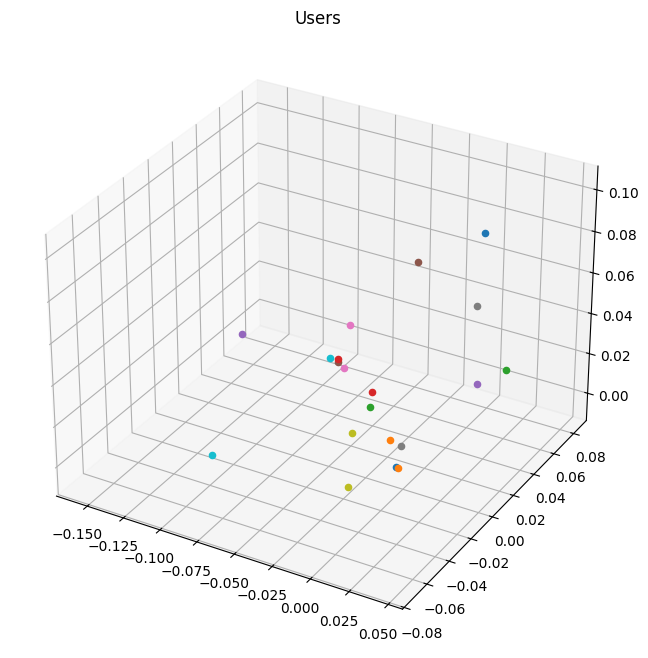

In [60]:
import matplotlib.pyplot as plt

users_to_visualize = 20
U_3d = U[:users_to_visualize, :3]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each user as a point in 3D space
for i in range(users_to_visualize):
    ax.scatter(U_3d[i, 0], U_3d[i, 1], U_3d[i, 2])

ax.set_title('Users')
plt.show()

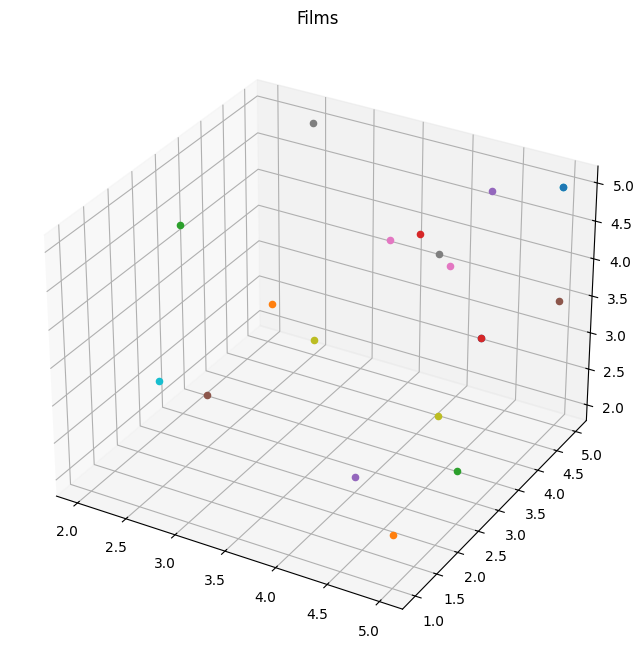

In [8]:
films_to_visualize = 20
R_subset = R[:films_to_visualize, :]

Vt_3d = R_subset.T

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(films_to_visualize):
    ax.scatter(Vt_3d[0, i], Vt_3d[1, i], Vt_3d[2, i])

ax.set_title('Films')
plt.show()

In [39]:
import pandas as pd

file_path = 'ratings.csv'  
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=30, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=30, axis=1)

display(ratings_matrix)

Ratings Matrix after dropping rows and columns with less than 30 non-NaN values:


movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k=100)
sigma = np.diag(sigma)
R_reconstructed = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
R_reconstructed_df = pd.DataFrame(R_reconstructed)
display(R_reconstructed_df)

,0,1,2,3,4,5,6,7,8,9,...,850,851,852,853,854,855,856,857,858,859
0,3.632073,2.822567,3.763985,2.247784,3.661173,2.436259,2.244502,2.892424,2.534106,2.301040,...,2.614909,2.635531,2.382414,2.469790,2.463745,2.422964,2.758730,2.468078,2.552232,2.523120
1,2.621517,2.466958,2.463170,2.595574,2.554728,2.439452,2.533150,2.454915,2.362789,2.463530,...,2.549186,2.444285,2.547775,2.592519,2.475809,2.479812,2.544337,2.530531,2.488257,2.473850
2,2.349128,2.529807,2.619193,2.687081,2.655968,2.928079,2.639806,2.499139,1.958744,2.574143,...,2.860151,2.430649,2.434340,2.458195,2.377415,2.136328,2.386098,2.452449,2.870686,2.304382
3,3.534066,2.906885,2.389527,2.567910,2.543205,2.672662,2.477749,2.897570,2.431580,2.831019,...,2.557637,2.462599,2.390422,2.489505,2.415725,2.469482,2.394266,2.553224,2.577266,2.477226
4,3.487760,3.551731,4.144735,3.761603,3.553632,3.804192,3.275037,3.758560,3.831802,3.571462,...,2.531807,2.487842,2.647380,2.360127,2.494705,2.664988,2.471074,2.519697,2.472891,2.645735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2.315114,2.558878,2.745879,2.327986,2.698118,2.759416,2.402647,2.594069,2.906446,4.202086,...,2.340037,2.596555,2.334310,2.828756,2.856465,2.699755,2.766799,2.712351,2.621514,2.627144
497,3.996054,2.603296,2.889613,2.434627,2.837357,2.446041,2.439738,2.844644,2.505302,2.602884,...,2.719900,2.522904,2.603169,2.270213,2.151043,2.176896,2.708037,2.194120,2.615528,2.224756
498,2.185856,1.876011,1.867296,2.370593,2.634909,2.466019,3.985831,2.888681,4.544610,2.481433,...,2.590178,2.273855,2.724257,2.578361,2.602855,2.890847,2.208787,2.647637,2.410948,2.829917
499,2.710669,2.650454,2.487739,2.499670,2.478504,2.489491,2.979569,2.631785,2.512930,2.424191,...,2.518616,2.462405,2.547359,2.521122,2.457940,2.484402,2.522454,2.455016,2.478239,2.445501


In [35]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)
display(preds_df)

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,3.632073,2.822567,3.763985,2.247784,3.661173,2.436259,2.244502,2.892424,2.534106,2.301040,...,2.614909,2.635531,2.382414,2.469790,2.463745,2.422964,2.758730,2.468078,2.552232,2.523120
3,2.621517,2.466958,2.463170,2.595574,2.554728,2.439452,2.533150,2.454915,2.362789,2.463530,...,2.549186,2.444285,2.547775,2.592519,2.475809,2.479812,2.544337,2.530531,2.488257,2.473850
4,2.349128,2.529807,2.619193,2.687081,2.655968,2.928079,2.639806,2.499139,1.958744,2.574143,...,2.860151,2.430649,2.434340,2.458195,2.377415,2.136328,2.386098,2.452449,2.870686,2.304382
5,3.534066,2.906885,2.389527,2.567910,2.543205,2.672662,2.477749,2.897570,2.431580,2.831019,...,2.557637,2.462599,2.390422,2.489505,2.415725,2.469482,2.394266,2.553224,2.577266,2.477226
6,3.487760,3.551731,4.144735,3.761603,3.553632,3.804192,3.275037,3.758560,3.831802,3.571462,...,2.531807,2.487842,2.647380,2.360127,2.494705,2.664988,2.471074,2.519697,2.472891,2.645735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.315114,2.558878,2.745879,2.327986,2.698118,2.759416,2.402647,2.594069,2.906446,4.202086,...,2.340037,2.596555,2.334310,2.828756,2.856465,2.699755,2.766799,2.712351,2.621514,2.627144
607,3.996054,2.603296,2.889613,2.434627,2.837357,2.446041,2.439738,2.844644,2.505302,2.602884,...,2.719900,2.522904,2.603169,2.270213,2.151043,2.176896,2.708037,2.194120,2.615528,2.224756
608,2.185856,1.876011,1.867296,2.370593,2.634909,2.466019,3.985831,2.888681,4.544610,2.481433,...,2.590178,2.273855,2.724257,2.578361,2.602855,2.890847,2.208787,2.647637,2.410948,2.829917


In [34]:
#2.2.6
predicted_ratings_matrix = ratings_matrix.copy()

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if not np.isnan(ratings_matrix.iloc[i, j]):
            predicted_ratings_matrix.iloc[i, j] = np.nan
        else:
            predicted_ratings_matrix.iloc[i, j] = all_user_predicted_ratings[i, j]
            
display(predicted_ratings_matrix)

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.822567,NaN,2.247784,NaN,2.436259,2.244502,2.892424,2.534106,2.301040,...,2.614909,2.635531,2.382414,2.469790,2.463745,2.422964,2.758730,2.468078,2.552232,2.523120
3,2.621517,2.466958,2.463170,2.595574,2.554728,2.439452,2.533150,2.454915,2.362789,2.463530,...,2.549186,2.444285,2.547775,2.592519,2.475809,2.479812,2.544337,2.530531,2.488257,2.473850
4,2.349128,2.529807,2.619193,2.687081,2.655968,2.928079,2.639806,2.499139,1.958744,2.574143,...,2.860151,2.430649,2.434340,2.458195,2.377415,2.136328,2.386098,2.452449,2.870686,2.304382
5,NaN,2.906885,2.389527,2.567910,2.543205,2.672662,2.477749,2.897570,2.431580,2.831019,...,2.557637,2.462599,2.390422,2.489505,2.415725,2.469482,2.394266,2.553224,2.577266,2.477226
6,3.487760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.531807,2.487842,2.647380,2.360127,2.494705,2.664988,2.471074,2.519697,2.472891,2.645735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,2.558878,2.745879,2.327986,2.698118,NaN,2.402647,NaN,2.906446,NaN,...,2.340037,2.596555,2.334310,2.828756,2.856465,2.699755,2.766799,2.712351,2.621514,2.627144
607,NaN,2.603296,2.889613,2.434627,2.837357,2.446041,2.439738,NaN,2.505302,2.602884,...,2.719900,2.522904,2.603169,2.270213,2.151043,2.176896,2.708037,2.194120,2.615528,2.224756
608,NaN,NaN,NaN,2.370593,2.634909,2.466019,NaN,2.888681,NaN,2.481433,...,2.590178,2.273855,2.724257,2.578361,2.602855,2.890847,2.208787,2.647637,2.410948,2.829917


In [33]:
movies_df = pd.read_csv('movies.csv')

def get_top_10_movies(user_id, predicted_ratings_matrix, ratings_matrix, movies_df):
    user_predicted_ratings = predicted_ratings_matrix.iloc[user_id - 1, :].values
    
    preds_df = pd.DataFrame(user_predicted_ratings, index=ratings_matrix.columns, columns=['predicted_rating'])
    
    preds_and_movies = preds_df.merge(movies_df, left_index=True, right_on='movieId')
    
    top_10_movies = preds_and_movies.sort_values(by='predicted_rating', ascending=False).head(10)
    
    return top_10_movies[['title', 'genres']]

top_10_movies_user1 = get_top_10_movies(1, predicted_ratings_matrix, ratings_matrix, movies_df)
display(top_10_movies_user1)    

,title,genres
5885,Crash (2004),Crime|Drama
326,Maverick (1994),Adventure|Comedy|Western
3628,"Royal Tenenbaums, The (2001)",Comedy|Drama
7355,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
7039,Up (2009),Adventure|Animation|Children|Drama
2174,Three Kings (1999),Action|Adventure|Comedy|Drama|War
1545,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance
926,Amadeus (1984),Drama
962,"Deer Hunter, The (1978)",Drama|War
858,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller


In [40]:
top_10_movies_user77 = get_top_10_movies(77, predicted_ratings_matrix, ratings_matrix, movies_df)
display(top_10_movies_user77)  

,title,genres
4360,Finding Nemo (2003),Adventure|Animation|Children|Comedy
5374,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy
8376,Interstellar (2014),Sci-Fi|IMAX
7693,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX
7302,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
878,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
197,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
46,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1067,Jaws (1975),Action|Horror
8466,Whiplash (2014),Drama


In [41]:
top_10_movies_user373 = get_top_10_movies(373, predicted_ratings_matrix, ratings_matrix, movies_df)
display(top_10_movies_user373) 

,title,genres
2605,High Fidelity (2000),Comedy|Drama|Romance
99,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
2641,American Psycho (2000),Crime|Horror|Mystery|Thriller
1644,Willow (1988),Action|Adventure|Fantasy
695,"Maltese Falcon, The (1941)",Film-Noir|Mystery
905,12 Angry Men (1957),Drama
44,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
201,Ed Wood (1994),Comedy|Drama
2514,Dog Day Afternoon (1975),Crime|Drama
656,Escape from L.A. (1996),Action|Adventure|Sci-Fi|Thriller
